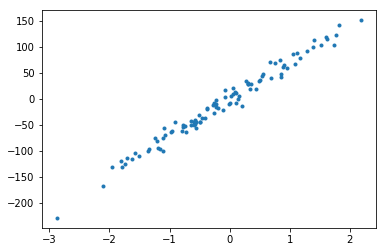

In [40]:
# This notebook is to test out things and a code scratch pad
import torch.nn as nn
import torch.nn.functional as F
import torch
import numpy as np
from torch.utils.data import TensorDataset, DataLoader
from torch.autograd import Variable
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
from torch import optim

n_features = 1
n_samples = 100

X, y = make_regression(
        n_samples = n_samples,
        n_features = n_features,
        noise = 10,
)

fix, ax = plt.subplots()
ax.plot(X, y, ".")



In [37]:
X = torch.from_numpy(X).float()

y = torch.from_numpy(y.reshape((n_samples,n_features))).float()

class LinReg(nn.Module):
    def __init__(self,input_dim):
        super().__init__()
        self.lin = nn.Linear(input_dim,1)
        
    def forward(self,X):
        return self.lin(X)
## ML has 4 things data, model, loss & optimizer

model = LinReg(n_features)
optimizer = optim.SGD(model.parameters(), lr=0.001)
criterion = nn.MSELoss()
num_epoch = 100

for epoch in range(num_epoch):
    model.train()
    optimizer.zero_grad()

    y_ = model.forward(X)
    loss = criterion(y_,y)

    loss.backward(loss)
    optimizer.step()

model.eval()
with torch.no_grad():
    y_ = model(X)
    
    
fig,ax = plt.subplots()
ax.plot(X.numpy(),y_.numpy(),".",label="pred")
ax.plot(X.numpy(),y.numpy(),".",label="pred")
ax.set_title(f"MSE: {loss.item():0.1f}")
ax.legend()


TypeError: expected np.ndarray (got Tensor)